# Predicting net electrical energy from plant for CCPP

1. Domain exploration
    - Understand the buisness process, understand the mindset of stakeholders on shopfloor
    - Understand common challenges,  business beleif, recent development in business
    - understand process of data collection, sources of data, common possible issues with data
    - Understand data lifecycle, business lifecycle
    
    
2. Data collection and exploration
    - collect data from multiple sources, build a dataset
    - perform common exploration to understand overall data quality
    
    
3. Data Cleaning
    - Handle missing values
    - Handle duplicated entrie
    - Handle outliers, unwanted columns
    

4. Feature Engineering
    Feature Extraction
    Feature Selection: Exploratory Data Analytics / Root Cause Analytics
    - Data Visualization
        - Unvariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
        
      
     - Statistical Research techniques
         - Correlation Analysis
         - ANOVA - f test
         - Chi Square test
       
       
5. Preprocessing of features
    - encode the features 
    - Standardize the numeric features
    - train test split
    
  
6. Apply ML on data
    - train the ML model
    
    
7. Performance ANalysis
    - Use appropriate metric to assess performance of ML model
    
    
8. Optimization and Tuning
    - improve the performance of model
    
    
9. Deploy the model
    - export the model as an object file (pickle file)
    - Deploy the model as REST API service
    
 
10. Monitor the performance in production

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Collection and Exploration

In [2]:
path = r"E:\MLIoT\ML\dataset\combined_cycle_power_plant_dataset.xlsx"
df = pd.read_excel(path)
df.shape

(9568, 5)

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Observations:
    
        Target column: PE
        features (all numeric): AT, V, ap, RH
        
        

## 3. Data Cleaning

In [5]:
# check for duplicated entries
df.duplicated().sum()

41

In [6]:
# drop the duplicated rows
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(9568, 5)
(9527, 5)


In [7]:
# check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
# check for outliers
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

## 4. Feature Engienering
### Feature selection: statistical research

### Correlation Analysis

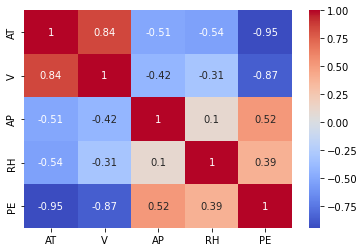

In [10]:
cor = df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

### ANOVA

- for any hypothesis testing scenario, we need to come up with a  business confidence (confidence interval) CI = 95%

- significance level, alpha = 1 - CI = 1 - 0.95 = 0.05

when you apply ANOVA or any other test, you will get pvalue

    if pvalue > alpha = we accept null hypothesis - feature is not important/informative
    if pvalue < alpha = we reject the null hypothesis - feature is important / informative

In [11]:
xnum = df[['AT','V','AP','RH']]
y = df.PE

from sklearn.feature_selection import f_regression
fscore, pvalue = f_regression(xnum,y)

for i in range(len(xnum.columns)):print(xnum.columns[i],pvalue[i])

AT 0.0
V 0.0
AP 0.0
RH 0.0


In [12]:
# selecting the final features
x = df.drop(columns=['PE'])
y = df.PE

## 5. Preprocessing of features

In [13]:
x.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [14]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)
print(x.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(9527, 4) (7621, 4) (1906, 4)
(9527,) (7621,) (1906,)


In [16]:
ytrain.std(),ytest.std()

(16.990596208894168, 17.235221205583574)

## 6. Apply ML - linear regression

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [18]:
# train the model using train data- xtrain,ytrain
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
newdata = [[11.8,40.66,1017.13,97.2]]
model.predict(newdata)

array([469.57026588])

## 7. Performance Analysis

In [20]:
# feed xtest and get predictions

ypred = model.predict(xtest)

In [21]:
# compute r2 score b/w ytest and ypred

from sklearn import metrics
metrics.r2_score(ytest,ypred)

0.9294405418373626

In [22]:
metrics.mean_absolute_error(ytest,ypred)

3.59165103085831

## 9. Deployment
#### Export the trained model as an object file (pickle file)

In [23]:
import joblib
joblib.dump(model,"ccpp_model.pkl")

['ccpp_model.pkl']